In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets,cluster,metrics
import matplotlib.pyplot as plt

# 1. 数据获取与处理

## 1.1 iris数据集

In [2]:
iris=datasets.load_iris()
iris.keys()
for i in range(4):
    iris['feature_names'][i]=iris['feature_names'][i][:-5]
print(iris.keys())
print(iris['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


In [3]:
l=pd.DataFrame(iris['data'],columns=iris['feature_names'])
r=pd.DataFrame(iris['target'],columns=['target'])
iris=pd.merge(l,r,left_index=True, right_index=True)
iris.sample(5)

,sepal length,sepal width,petal length,petal width,target
63,6.1,2.9,4.7,1.4,1
45,4.8,3.0,1.4,0.3,0
55,5.7,2.8,4.5,1.3,1
66,5.6,3.0,4.5,1.5,1
35,5.0,3.2,1.2,0.2,0


In [4]:
iris.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


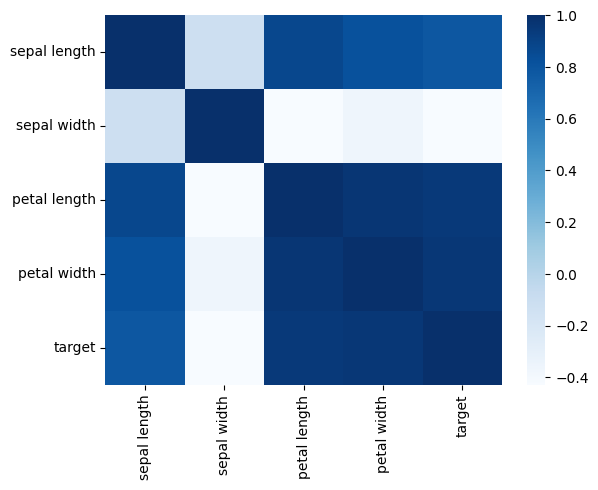

In [5]:
sns.heatmap(iris.corr(),cmap='Blues')
plt.show()

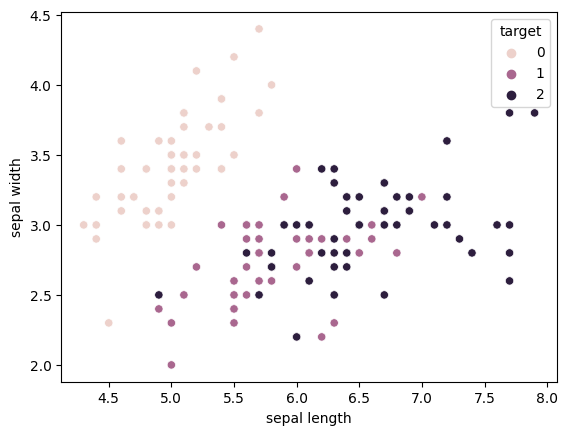

In [6]:
sns.scatterplot(data=iris,x='sepal length',y='sepal width',hue='target')
plt.show()

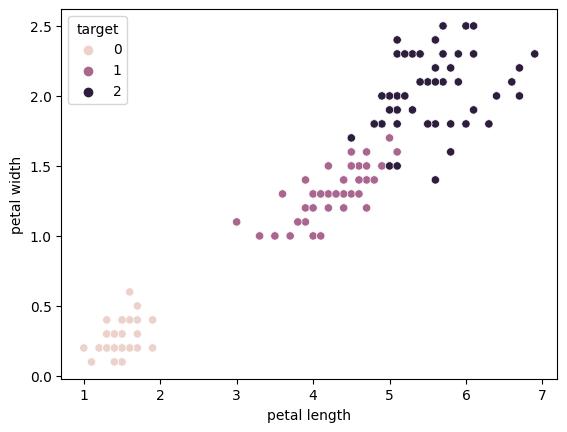

In [7]:
sns.scatterplot(data=iris,x='petal length',y='petal width',hue='target')
plt.show()

## 1.2 wine数据集

In [8]:
wine=datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [9]:
l = pd.DataFrame(wine['data'], columns=wine['feature_names'])
r = pd.DataFrame(wine['target'], columns=['target'])
wine = pd.merge(l, r, left_index=True, right_index=True)
wine.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0,2


In [10]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


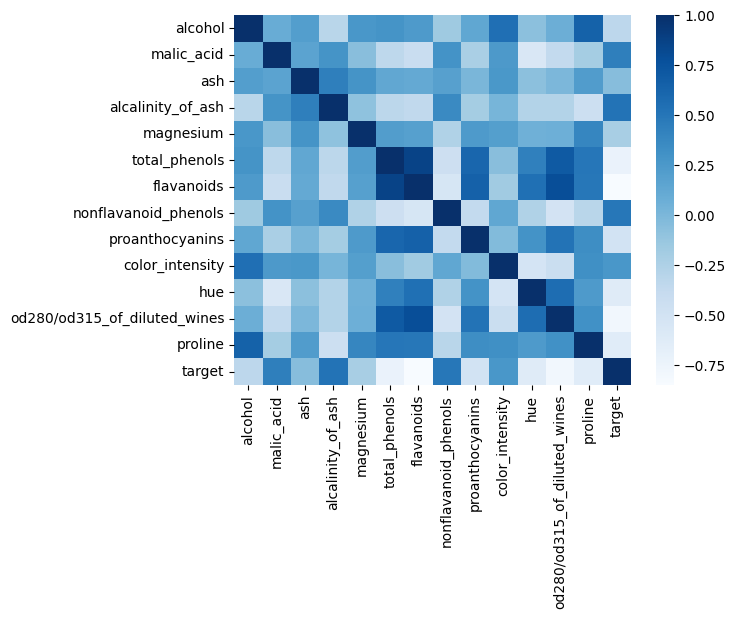

In [11]:
sns.heatmap(wine.corr(),cmap='Blues')
plt.show()

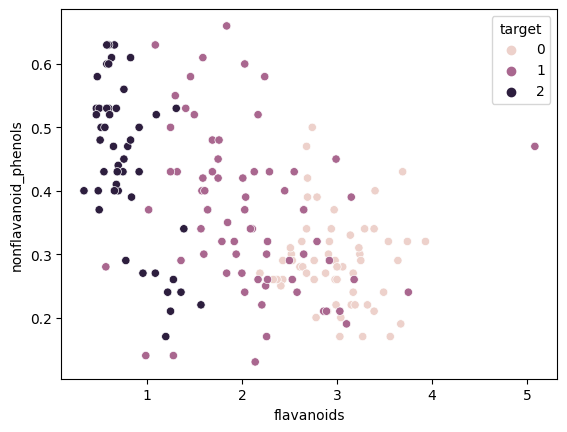

In [12]:
sns.scatterplot(data=wine,x='flavanoids',y='nonflavanoid_phenols',hue='target')
plt.show()

# 2. K-means聚类

In [13]:
km_cluster = cluster.KMeans(n_clusters=3, n_init=100)
data=datasets.load_iris(return_X_y=True)[0]
result = km_cluster.fit_predict(data)
ans1=datasets.load_iris(return_X_y=True)[1]
predect1=result
center1=km_cluster.cluster_centers_
print(center1)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


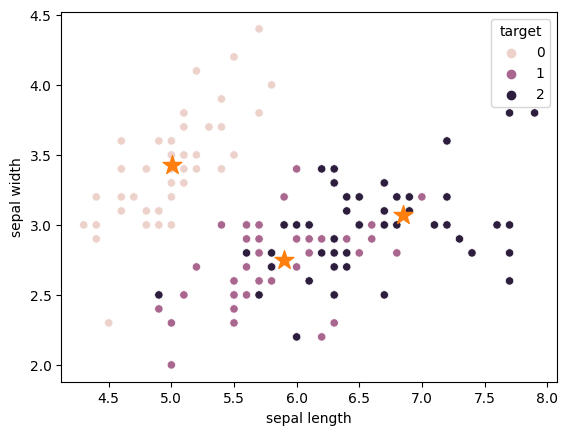

In [14]:
sns.scatterplot(data=iris,x='sepal length',y='sepal width',hue='target')
x=[i[0] for i in center1]
y=[i[1] for i in center1]
plt.scatter(x,y,marker='*',s=200)
plt.show()

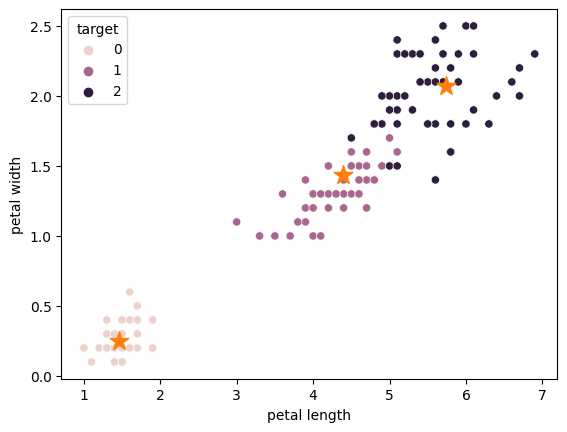

In [15]:
sns.scatterplot(data=iris,x='petal length',y='petal width',hue='target')
x=[i[2] for i in center1]
y=[i[3] for i in center1]
plt.scatter(x,y,marker='*',s=200)
plt.show()

# 3. ISODATA动态聚类

In [16]:
from sklearn.metrics import euclidean_distances

class ISODATA():
    def __init__(self, data:tuple, designCenterNum, LeastSampleNum, StdThred, LeastCenterDist, iterationNum):
        '数据、预期的聚类数、每类最小样本数、标准差阈值、最小中心距离、迭代次数'
        self.K = designCenterNum
        self.thetaN = LeastSampleNum
        self.thetaS = StdThred
        self.thetaC = LeastCenterDist
        self.iteration = iterationNum

        # 初始化
        self.data, self.label = data

        self.center = self.data[0, :].reshape((1, -1))
        self.centerNum = 1
        self.centerMeanDist = 0

        # seaborn风格
        sns.set()

    def updateLabel(self):
        """
            更新中心
        """
        for i in range(self.centerNum):
            # 计算样本到中心的距离
            distance = euclidean_distances(self.data, self.center.reshape((self.centerNum, -1)))
            # 为样本重新分配标签
            self.label = np.argmin(distance, 1)
            # 找出同一类样本
            index = np.argwhere(self.label == i).squeeze()
            # print(i,index)
            # print('label',self.label)
            # print('index',index)
            sameClassSample = self.data[index, :]
            # 更新中心
            self.center[i, :] = np.mean(sameClassSample, 0)
            # print(self.center)
        # print('poipoipoi',self.center.shape[0],self.centerNum)
        for i in range(self.center.shape[0]):
            # print('center',self.center[i, :])
            if np.isnan(self.center[i,0]):
                # print('VEVEVEVE',i)
                self.center=np.vstack((self.center[:i,:],self.center[i+1:,:]))
                self.centerNum-=1
                # print('center2',self.center)
        # 计算所有类到各自中心的平均距离之和
        for i in range(self.centerNum):
            # 找出同一类样本
            index = np.argwhere(self.label == i).squeeze()
            # print('i',index.shape)
            # if index.shape==(0,):
            #     self.centerNum=i
            #     break
            sameClassSample = self.data[index, :]
            # 计算样本到中心的距离
            # print(sameClassSample.shape)
            # print(self.center[i, :].reshape((1, -1)).shape)
            # print(sameClassSample)
            # print(self.center[i, :].reshape((1, -1)))
            distance = np.mean(euclidean_distances(sameClassSample, self.center[i, :].reshape((1, -1))))
            # 更新中心
            self.centerMeanDist += distance
        self.centerMeanDist /= self.centerNum

    def divide(self):
        # 临时保存更新后的中心集合,否则在删除和添加的过程中顺序会乱
        newCenterSet = self.center
        # 计算每个类的样本在每个维度的标准差
        for i in range(self.centerNum):
            # 找出同一类样本
            index = np.argwhere(self.label == i).squeeze()
            sameClassSample = self.data[index, :]
            # 计算样本到中心每个维度的标准差
            stdEachDim = np.mean((sameClassSample - self.center[i, :])**2, axis=0)
            # 找出其中维度的最大标准差
            maxIndex = np.argmax(stdEachDim)
            maxStd = stdEachDim[maxIndex]
            # 计算样本到本类中心的距离
            distance = np.mean(euclidean_distances(sameClassSample, self.center[i, :].reshape((1, -1))))
            # 如果最大标准差超过了阈值
            if maxStd > self.thetaS:
                # 还需要该类的样本数大于于阈值很多 且 太分散才进行分裂
                if self.centerNum <= self.K//2 or \
                        sameClassSample.shape[0] > 2 * (self.thetaN+1) and distance >= self.centerMeanDist:
                    newCenterFirst = self.center[i, :].copy()
                    newCenterSecond = self.center[i, :].copy()

                    newCenterFirst[maxIndex] += 0.5 * maxStd+1
                    newCenterSecond[maxIndex] -= 0.5 * maxStd+1

                    # 删除原始中心
                    newCenterSet = np.delete(newCenterSet, i, axis=0)
                    # 添加新中心
                    newCenterSet = np.vstack((newCenterSet, newCenterFirst))
                    newCenterSet = np.vstack((newCenterSet, newCenterSecond))

            else:
                continue
        # 更新中心集合
        self.center = newCenterSet
        self.centerNum = self.center.shape[0]

    def combine(self):
        # 临时保存更新后的中心集合,否则在删除和添加的过程中顺序会乱
        delIndexList = []

        # 计算中心之间的距离
        centerDist = euclidean_distances(self.center, self.center)
        centerDist += (np.eye(self.centerNum)) * 10**10
        # 把中心距离小于阈值的中心对找出来
        while True:
            # 如果最小的中心距离都大于阈值的话，则不再进行合并
            minDist = np.min(centerDist)
            if minDist >= self.thetaC:
                break
            # 否则合并
            index = np.argmin(centerDist)
            row = index // self.centerNum
            col = index % self.centerNum
            # 找出合并的两个类别
            index = np.argwhere(self.label == row).squeeze()
            classNumFirst = len(index)
            index = np.argwhere(self.label == col).squeeze()
            classNumSecond = len(index)
            newCenter = self.center[row, :] * (classNumFirst / (classNumFirst+ classNumSecond)) + \
                        self.center[col, :] * (classNumSecond / (classNumFirst+ classNumSecond))
            # 记录被合并的中心
            delIndexList.append(row)
            delIndexList.append(col)
            # 增加合并后的中心
            self.center = np.vstack((self.center, newCenter))
            self.centerNum -= 1
            # 标记，以防下次选中
            centerDist[row, :] = float("inf")
            centerDist[col, :] = float("inf")
            centerDist[:, col] = float("inf")
            centerDist[:, row] = float("inf")

        # 更新中心
        self.center = np.delete(self.center, delIndexList, axis=0)
        self.centerNum = self.center.shape[0]

    def drawResult(self,i):
        ax = plt.gca()
        # ax.clear()
        ax.scatter(self.data[:, 2], self.data[:, 3], c=self.label, cmap="cool")
        x=[i[2] for i in self.center]
        y=[i[3] for i in self.center]
        ax.scatter(x,y,marker='*',s=200,c='green')
        ax.set_title('iter:'+str(i)+'  '+'centerNum:'+str(self.centerNum))
        # plt.show()


    def train(self):
        # 初始化中心和label
        self.updateLabel()
        # fig,subs=plt.subplots(4,3)
        plt.figure(figsize=(20,25))
        plt.subplot(4,5,1)
        self.drawResult(0)

        # 到设定的次数自动退出
        for i in range(self.iteration):
            # print('qweqweqwe',self.centerNum)
            # print(self.center)
            # 如果是偶数次迭代或者中心的数量太多，那么进行合并
            if self.centerNum < self.K //2:
                self.divide()
                # print('divide1', self.centerNum)
            elif (i > 0 and i % 2 == 0) or self.centerNum > 2 * self.K:
                self.combine()
                # print('combine', self.centerNum)
            else:
                self.divide()
                # print('divide2', self.centerNum)
            # 更新中心
            # print('asdasdasd',self.centerNum)
            # print(self.center)
            self.updateLabel()
            # print('zxczxczxc',self.centerNum)
            # print(self.center)
            plt.subplot(4,5,i+1)
            self.drawResult(i)
        plt.show()

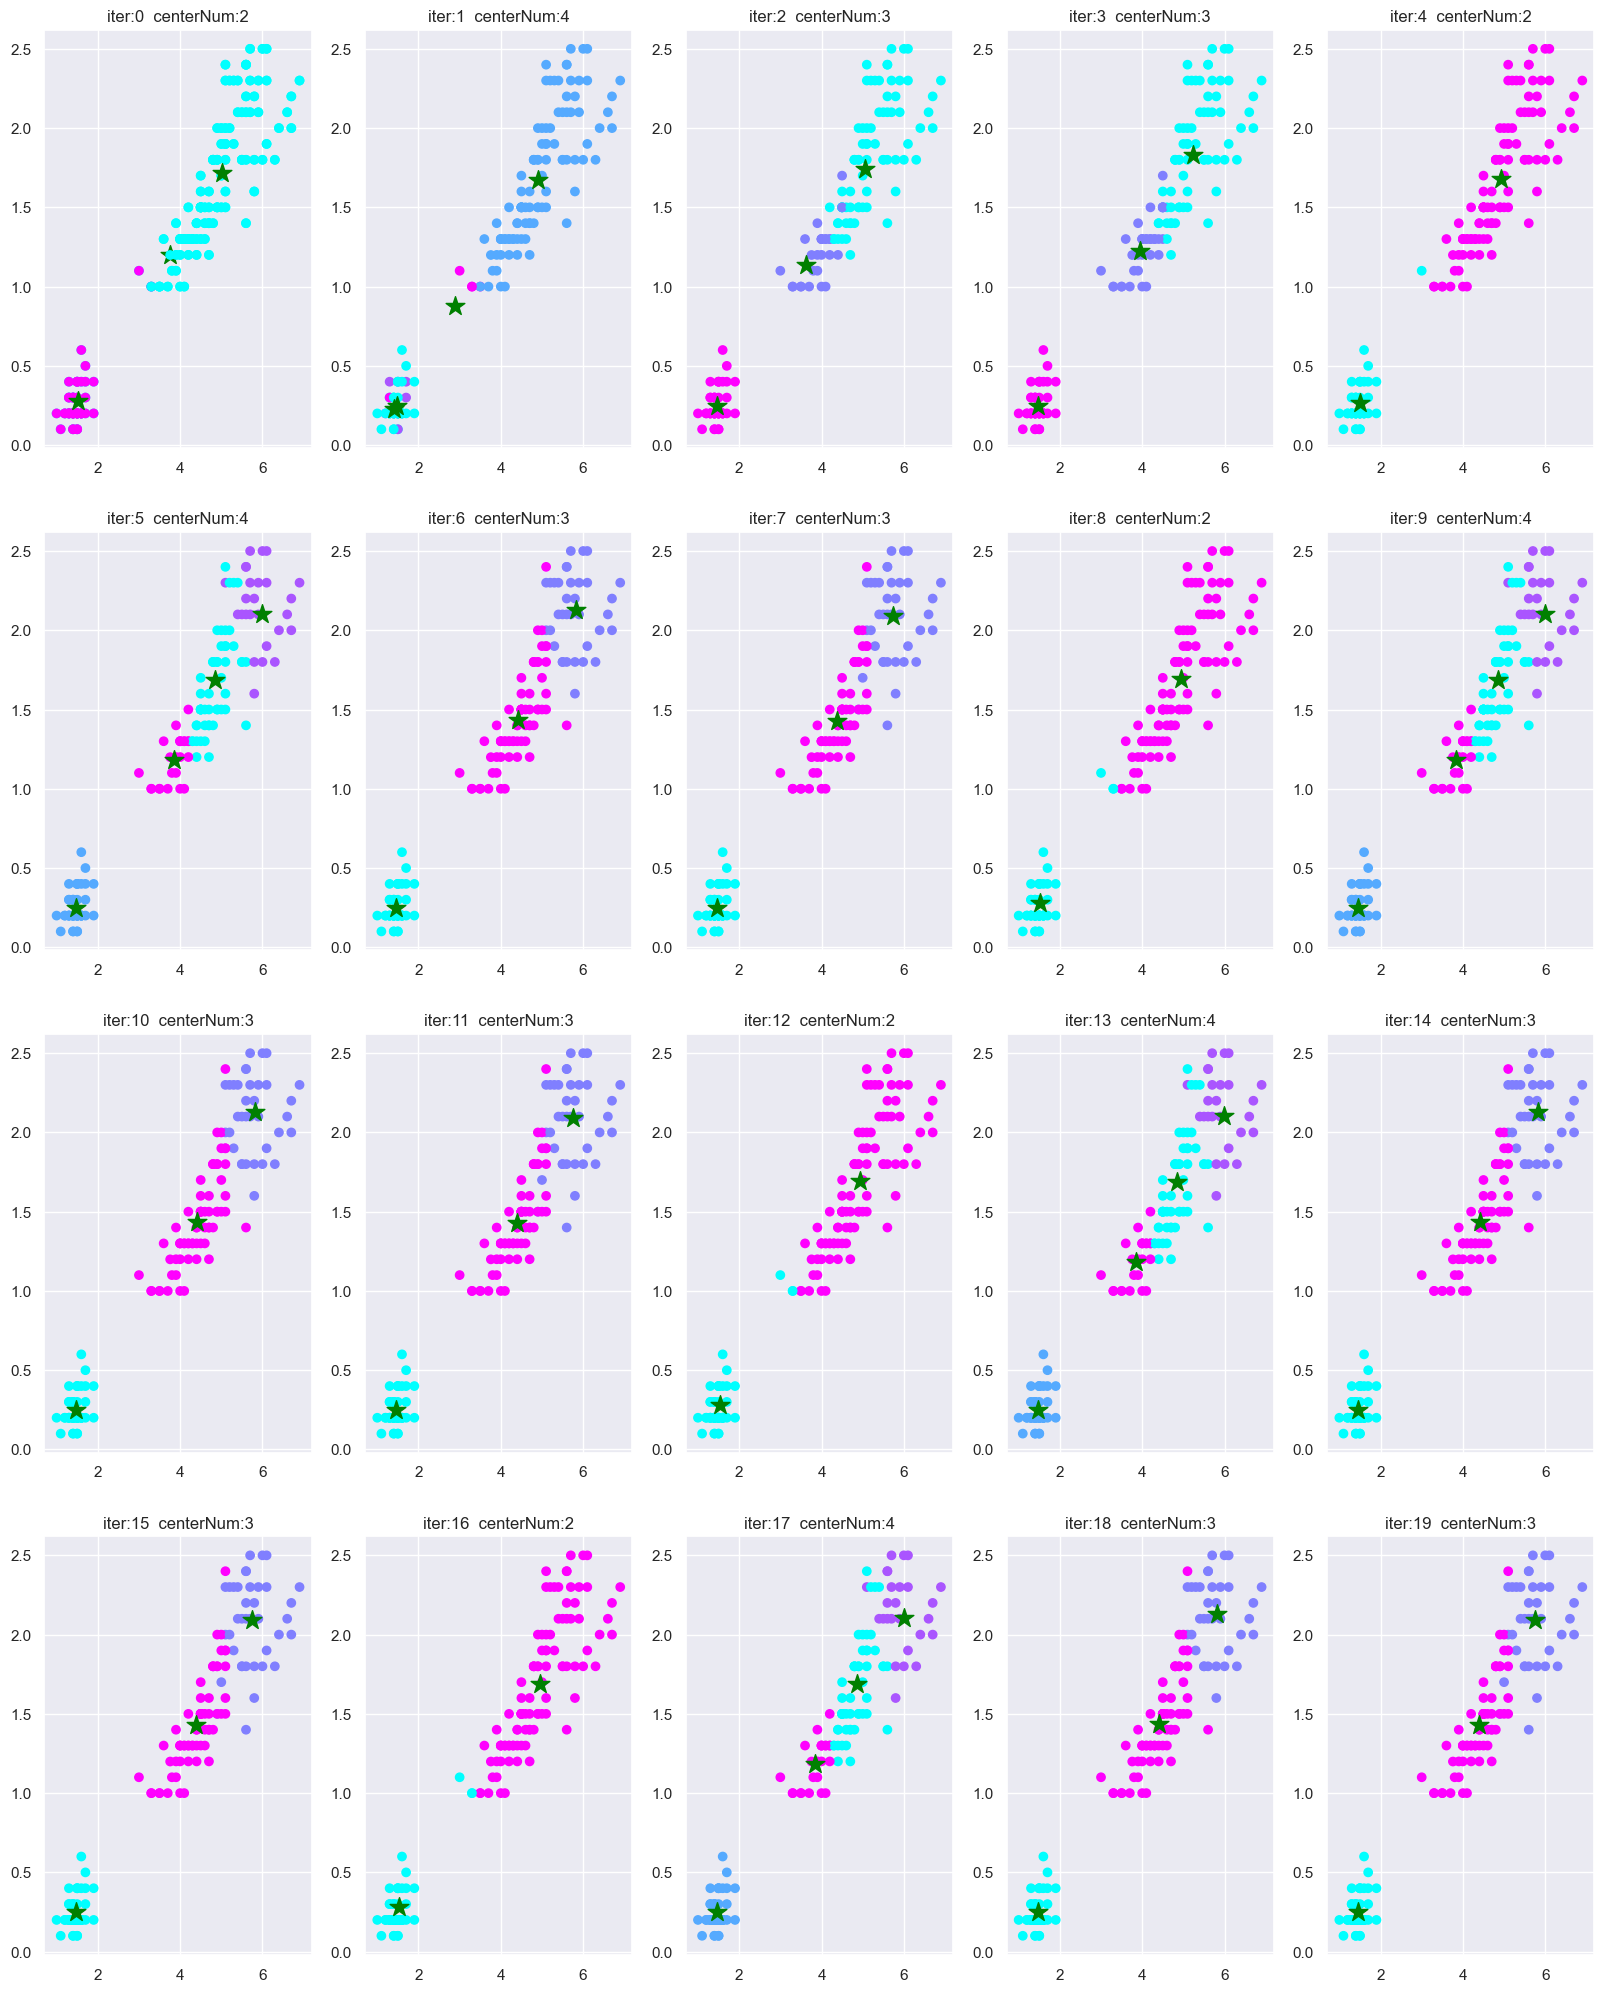

[[5.00408163 3.42653061 1.46326531 0.24693878]
 [6.87027027 3.08648649 5.74594595 2.08918919]
 [5.90068783 2.75329101 4.38346032 1.43014815]]


In [26]:
isoData = ISODATA(datasets.load_iris(return_X_y=True),designCenterNum=4, LeastSampleNum=20, StdThred=0.1, LeastCenterDist=2, iterationNum=20)
isoData.train()
predect2 = isoData.label
print(isoData.center)

# 4. wine数据集

In [18]:
km_cluster = cluster.KMeans(n_clusters=3, n_init=100)
data=datasets.load_wine(return_X_y=True)[0]
result = km_cluster.fit_predict(data)
ans3=datasets.load_wine(return_X_y=True)[1]
predect3=result
center3=km_cluster.cluster_centers_
print(center3)

[[1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]


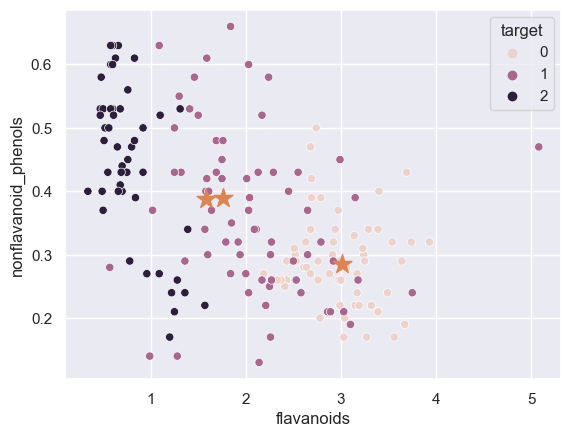

In [19]:
sns.scatterplot(data=wine,x='flavanoids',y='nonflavanoid_phenols',hue='target')
x=[i[6] for i in center3]
y=[i[7] for i in center3]
plt.scatter(x,y,marker='*',s=200)
plt.show()

C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid valu

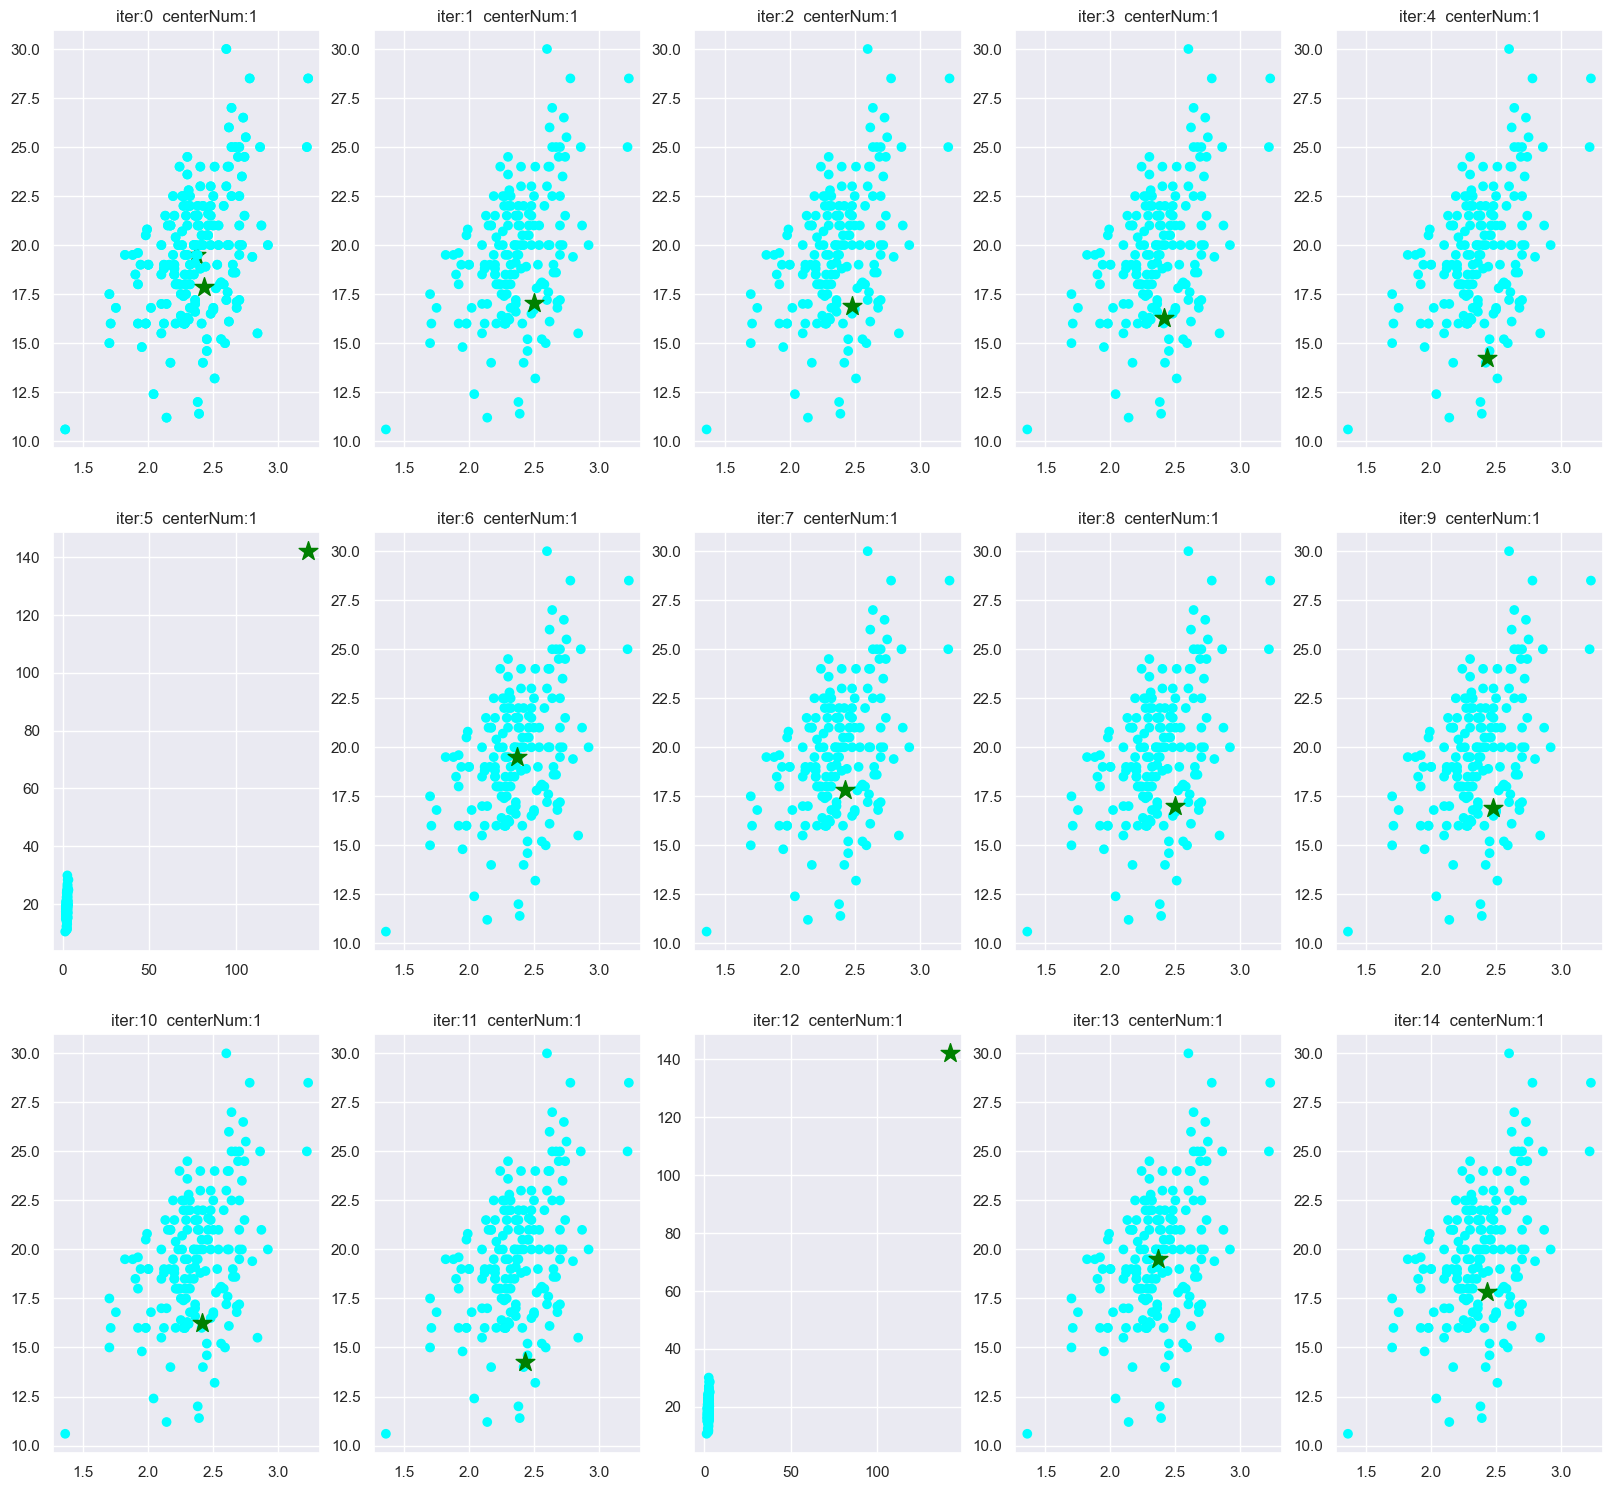

[[1.35669101e+01 2.06910350e+00 2.42840165e+00 1.78421823e+01
  1.07376642e+02 2.66345229e+00 2.62604605e+00 3.08617661e-01
  1.82240703e+00 5.58391676e+00 1.01990774e+00 2.94100965e+00
  1.06749145e+03]]


In [27]:
isoData = ISODATA(datasets.load_wine(return_X_y=True),designCenterNum=4, LeastSampleNum=10, StdThred=0.1, LeastCenterDist=3, iterationNum=15)
isoData.train()
predect4 = isoData.label
print(isoData.center)

# 5. 结果分析

In [21]:
def match(result,count:tuple):
    f=lambda x:(x.count(0),x.count(1),x.count(2))
    d={0:0,1:1,2:2}
    x=(0,count[0],count[1])
    y=(count[0],count[1],count[2])
    for i in range(3):
        a=list(result[x[i]:y[i]])
        c=f(a)
        if c[0]==max(c):
            d[i]=0
        elif c[1]==max(c):
            d[i]=1
        else:
            d[i]=2
    for i in range(count[2]):
        result[i]=d[result[i]]
    return result

In [22]:
predect1=match(predect1,(50,100,150))
print(metrics.confusion_matrix(ans1, predect1))
print(metrics.classification_report(ans1, predect1))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [23]:
predect2 = match(predect2, (50, 100, 150))
print(metrics.confusion_matrix(ans1, predect2))
print(metrics.classification_report(ans1, predect2))

[[49  1  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.76      0.96      0.85        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



In [24]:
predect3 = match(predect3, (59,130,178))
print(metrics.confusion_matrix(ans3, predect3))
print(metrics.classification_report(ans3, predect3))

[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        59
           1       0.72      0.70      0.71        71
           2       0.47      0.60      0.53        48

    accuracy                           0.70       178
   macro avg       0.72      0.70      0.70       178
weighted avg       0.74      0.70      0.71       178



In [25]:
predect4 = match(predect4, (59,130,178))
print(metrics.confusion_matrix(ans3, predect4))
print(metrics.classification_report(ans3, predect4))

[[59  0  0]
 [71  0  0]
 [48  0  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        59
           1       0.00      0.00      0.00        71
           2       0.00      0.00      0.00        48

    accuracy                           0.33       178
   macro avg       0.11      0.33      0.17       178
weighted avg       0.11      0.33      0.17       178



C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lzh20\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
